In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("D:\\Users\\megha\\Downloads\\Data Science Machine failure prediction - Major project\\Machine failure prediction - Major project\\data (1).csv")
print(df)
print(df.shape)

     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0           0         7   7    1   6    6  36   3            1     1
1         190         1   3    3   5    1  20   4            1     0
2          31         7   2    2   6    1  24   6            1     0
3          83         4   3    4   5    1  28   6            1     0
4         640         7   5    6   4    0  68   6            1     0
..        ...       ...  ..  ...  ..  ...  ..  ..          ...   ...
939         0         7   7    1   6    4  73   6           24     1
940         0         7   5    2   6    6  50   6           24     1
941         0         3   6    2   7    5  43   6           24     1
942         0         6   6    2   5    6  46   7           24     1
943        18         7   4    2   6    3  61   7           24     1

[944 rows x 10 columns]
(944, 10)


In [4]:
print(df.isnull().sum())


footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


In [5]:
X=df.drop(columns=['fail'])
y=df['fail']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
model=LogisticRegression(random_state=42)
model.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

In [8]:
y_pred=model.predict(X_test_scaled)

acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
con=confusion_matrix(y_test,y_pred)
print("Accuracy: ",acc)
print("Precision: ",pre)
print("Confusion_matrix: ",con)

Accuracy:  0.8677248677248677
Precision:  0.8369565217391305
Confusion_matrix:  [[87 15]
 [10 77]]


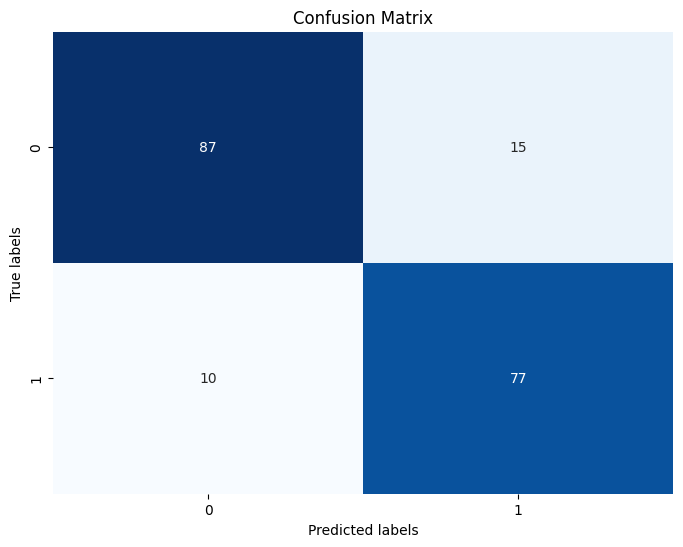

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap= 'Blues', fmt= 'd', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()